# 🧠 Mental Health Crisis Analysis GSoC 2025 Evaluation Test

This notebook is part of the evaluation test for the GSoC 2025 project:  
**"AI-Powered Behavioral Analysis for Suicide Prevention and Crisis Detection with Geospatial Trend Analysis"** under ISSR.

**Author**: **Shraddha Gujar**
**Time Period**: 26 March 2025 to 6 April 2025
---

## 📋 Overview

This notebook covers the following tasks:

   1. **Social Media Data Extraction & Preprocessing**
   2. **Sentiment & Crisis Risk Classification**
   3. **Geolocation & Crisis Heatmap Visualization**


## ✅ Task 1: Social Media Data Extraction & Preprocessing

- Extract Reddit posts using Pushshift API based on crisis-related keywords.
- Store: Post ID, Timestamp, Content, Score, Number of Comments.
- Clean text: Remove stopwords, emojis, special characters, and URLs.


In [5]:
# Step 1: Install dependencies (run once)
!pip install praw pandas nltk

# Step 2: Import libraries
import praw
import pandas as pd
import datetime
import nltk
import re
import string
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
import seaborn as sns
nltk.download('stopwords')
nltk.download('vader_lexicon')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [6]:
# Step 3: Authenticate with Reddit
reddit = praw.Reddit(
    client_id="wuRRxfSTIXiQnMSpIbauIA",
    client_secret="7NL42l5ZiTCBWcZTFyHAcz9I9lbDtA",
    user_agent="gsoc_mental_health_analysis"
)

In [7]:
# Step 4: Define search keywords and subreddits
# ✅ Multiple subreddits
subreddits = [
    "depression", "SuicideWatch", "addiction", "mentalhealth", "BPD",
    "Anxiety", "depersonalization", "PanicAttack", "offmychest",
    "TrueOffMyChest"
]

keywords = [
    "depressed", "suicidal", "mental breakdown", "addiction help", "overwhelmed",
    "anxiety attack", "loneliness", "I can't go on", "panic", "relapse",
    "I feel empty", "hopeless", "worthless", "end it all", "I need help"
]



In [8]:
from datetime import datetime

In [9]:
# ✅ Extract Data from Reddit
data = []

for sub in subreddits:
    print(f"🔍 Scraping r/{sub}...")
    subreddit = reddit.subreddit(sub)
    try:
       for submission in subreddit.search(" OR ".join(keywords), sort="new", time_filter="year", limit=200):
           data.append({
            "id": submission.id,
            "timestamp": datetime.fromtimestamp(submission.created_utc),
            "title": submission.title,
            "selftext": submission.selftext,
            "upvotes": submission.score,
            "num_comments": submission.num_comments,
            "url": submission.url
           })
    except Exception as e:
        print(f"⚠️ Error in r/{sub}: {e}")

print(f"\n Total posts extracted: {len(data)}")

# ✅ Convert to DataFrame & Combine Text

if len(data) == 0:
    print("No posts found. Check Reddit credentials or rate limits.")
else:
    df = pd.DataFrame(data)
    df['text'] = df['title'].fillna("") + " " + df['selftext'].fillna("")
    # ✅ Text Preprocessing Function
    def clean_text(text):
        text = text.lower()
        text = re.sub(r"http\S+", "", text)  # remove URLs
        text = re.sub(r"@[A-Za-z0-9_]+", "", text)  # remove mentions
        text = re.sub(r"#[A-Za-z0-9_]+", "", text)  # remove hashtags
        text = text.translate(str.maketrans("", "", string.punctuation))
        text = re.sub(r"\d+", "", text)  # remove numbers
        text = re.sub(r"[^\x00-\x7F]+", "", text)  # remove emojis
        stop_words = set(stopwords.words('english'))
        text = " ".join([word for word in text.split() if word not in stop_words])
        return text

    df['clean_text'] = df['text'].apply(clean_text)

    # ✅ Save Dataset
    df.to_csv("reddit_crisis_cleaned.csv", index=False)
    print("\n Cleaned dataset saved as 'reddit_crisis_cleaned.csv'")


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



🔍 Scraping r/depression...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



🔍 Scraping r/SuicideWatch...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



🔍 Scraping r/addiction...
🔍 Scraping r/mentalhealth...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



🔍 Scraping r/BPD...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



🔍 Scraping r/Anxiety...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



🔍 Scraping r/depersonalization...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



🔍 Scraping r/PanicAttack...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



🔍 Scraping r/offmychest...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



🔍 Scraping r/TrueOffMyChest...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.




✅ Total posts extracted: 1466

 Cleaned dataset saved as 'reddit_crisis_cleaned.csv'


In [10]:
df.shape

(1466, 9)

In [11]:
df

,id,timestamp,title,selftext,upvotes,num_comments,url,text,clean_text
0,1jsd3jr,2025-04-05 20:40:10,Can't help but isolate myself from everyone fo...,I'm always socially anxious and have dealt wit...,3,4,https://www.reddit.com/r/depression/comments/1...,Can't help but isolate myself from everyone fo...,cant help isolate everyone months even im wors...
1,1js9z26,2025-04-05 18:23:30,Sick joke,Life really feels like a sick joke. Everyone g...,3,0,https://www.reddit.com/r/depression/comments/1...,Sick joke Life really feels like a sick joke. ...,sick joke life really feels like sick joke eve...
2,1js5py6,2025-04-05 15:15:57,struggles with depression,"Hey everyone, just thought I'd share a bit, an...",2,2,https://www.reddit.com/r/depression/comments/1...,"struggles with depression Hey everyone, just t...",struggles depression hey everyone thought id s...
3,1js5f7i,2025-04-05 15:02:23,Weird day,Had a anxiety attack just now. I am sure my ey...,3,0,https://www.reddit.com/r/depression/comments/1...,Weird day Had a anxiety attack just now. I am ...,weird day anxiety attack sure eyes swollen bur...
4,1jry584,2025-04-05 07:35:20,I had to post to get it off my chest. Maybe it...,You know I really don't want to leave you. I d...,3,1,https://www.reddit.com/r/depression/comments/1...,I had to post to get it off my chest. Maybe it...,post get chest maybe itll hhelp maybe wont lif...
...,...,...,...,...,...,...,...,...,...
1461,1ij2lgn,2025-02-06 13:31:56,Getting out of a toxic relationship,My partner (M31) and I (W28) have been togethe...,2,0,https://www.reddit.com/r/TrueOffMyChest/commen...,Getting out of a toxic relationship My partner...,getting toxic relationship partner w together ...
1462,1iize38,2025-02-06 10:18:34,Fell in love with someone but they discovered ...,I (19m) fell back in love with someone (19nb) ...,1,9,https://www.reddit.com/r/TrueOffMyChest/commen...,Fell in love with someone but they discovered ...,fell love someone discovered lesbian advice fe...
1463,1ii8drn,2025-02-05 12:00:20,I dont like who I am at all,I really dont know why I'm like this. I dont f...,7,2,https://www.reddit.com/r/TrueOffMyChest/commen...,I dont like who I am at all I really dont know...,dont like really dont know im like dont feel l...
1464,1ii42y4,2025-02-05 06:40:58,My friend murdered her husband and I just foun...,"Throwaway account, who knows who's reading thi...",1077,64,https://www.reddit.com/r/TrueOffMyChest/commen...,My friend murdered her husband and I just foun...,friend murdered husband found several weeks fa...


## 💬 Task 2: Sentiment & Crisis Risk Classification

- Use VADER for sentiment analysis.
- Define simple rules to classify risk level (High / Moderate / Low).
- Visualize sentiment and risk distributions.


In [12]:
# ✅ Task 2: Sentiment & Crisis Risk Classification
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

if len(data) == 0:
    print("No posts found. Check Reddit credentials or rate limits.")
else:
    # Sentiment Analysis using VADER
    sia = SentimentIntensityAnalyzer()
    df['sentiment_score'] = df['clean_text'].apply(lambda x: sia.polarity_scores(x)['compound'])
    df['sentiment'] = df['sentiment_score'].apply(
        lambda score: 'Positive' if score > 0.05 else ('Negative' if score < -0.05 else 'Neutral')
    )

    # Crisis Risk Categorization
    def classify_risk(text):
        text = text.lower()
        high_risk_terms = ["end it all", "suicidal", "i don't want to live", "kill myself"]
        moderate_terms = ["i need help", "feel lost", "struggling", "i feel empty", "relapse"]

        if any(term in text for term in high_risk_terms):
            return "High-Risk"
        elif any(term in text for term in moderate_terms):
            return "Moderate Concern"
        else:
            return "Low Concern"

    df['risk_level'] = df['clean_text'].apply(classify_risk)
    # ✅ Save Final Classified Dataset
    df.to_csv("reddit_crisis_classified.csv", index=False)
    print("\n✅ Classified dataset saved as 'reddit_crisis_classified.csv'")

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!



✅ Classified dataset saved as 'reddit_crisis_classified.csv'


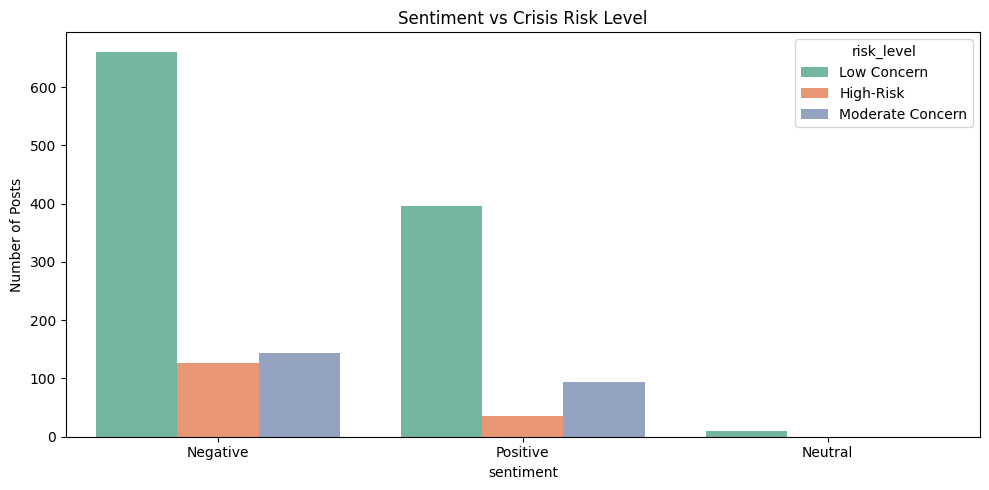

In [13]:
# ✅ Visualize Distribution
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='sentiment', hue='risk_level', palette='Set2')
plt.title("Sentiment vs Crisis Risk Level")
plt.ylabel("Number of Posts")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

## 🌍 Task 3: Crisis Geolocation & Heatmap

- Extract location entities from post text using spaCy.
- Geocode locations using GeoPy.
- Plot heatmap using Folium.


In [14]:
# 📌 Task 3: Crisis Geolocation & Mapping
# Install Required Libraries
!pip install geopy folium
import folium
from geopy.geocoders import Nominatim
from geopy.exc import GeocoderTimedOut
from folium.plugins import HeatMap
import time



In [15]:
# ✅ Initialize geolocator
geolocator = Nominatim(user_agent="mental_health_mapper")

# ✅ Simple location extractor using keyword matching (basic NLP)
# You can improve this using spaCy's NER in future
locations = []
common_places = ["New York", "Los Angeles", "London", "Austin", "Chicago",
                 "Toronto", "San Francisco", "Boston", "Seattle", "Mumbai", "Delhi", "Bangalore"]


In [16]:
for text in df['clean_text']:
    for place in common_places:
        if place.lower() in text.lower():
            locations.append(place)

# ✅ Count locations
from collections import Counter
location_freq = Counter(locations)




📍 Top Mentioned Locations:


In [19]:
print("\n📍 Top Mentioned Locations:")
for loc, freq in location_freq.most_common(5):
    print(f"{loc}: {freq} mentions")

# ✅ Geocode top 5 locations
geo_data = []
for loc, freq in location_freq.most_common(5):
    try:
        location = geolocator.geocode(loc, timeout=10)
        if location:
            geo_data.append([location.latitude, location.longitude, freq])
        time.sleep(1)  # To respect API limits
    except GeocoderTimedOut:
        print(f"Timeout: {loc}")


📍 Top Mentioned Locations:
Austin: 49 mentions
London: 4 mentions
Toronto: 2 mentions
New York: 2 mentions
Mumbai: 1 mentions


In [21]:
# ✅ Generate Heatmap

if geo_data:
    map_center = geo_data[0][:2]
    m = folium.Map(
        location=map_center,
        zoom_start=4,
        tiles="Stamen Toner",
        attr="Map tiles by Stamen Design, CC BY 3.0 — Map data © OpenStreetMap contributors"
    )
    HeatMap(geo_data).add_to(m)
    display(m)
else:
    print("❌ No geolocation data to plot.")
